# 🌿🌀 In Depth: Correlation Myths and Misconception

Correlation is often misunderstood and misapplied, leading to incorrect conclusions in data analysis. This notebook delves deep into common myths and misconceptions about correlation, highlighting the limitations of correlation in detecting relationships and the dangers of relying solely on correlation for drawing conclusions.

### Topics Covered:
1. **Correlation ≠ Independence**: Why zero correlation doesn’t imply independence and how correlation only captures linear relationships.
2. **Correlation is not Causation**: Understanding why a strong correlation between two variables does not necessarily mean that one causes the other.
3. **Simpson's Paradox**: How aggregated data can mislead and obscure the true relationship between variables.


# Correlation ≠ Independence

### What is Correlation?

Correlation measures the strength and direction of a linear relationship between two variables. The most commonly used correlation coefficient is Pearson's correlation, which ranges from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear relationship.

The formula for Pearson’s correlation coefficient $r$ is:

$$ r = \frac{\text{cov}( X, Y )}{\sigma_{ X } \sigma_{ Y }} $$

Where:
- $\text{cov}( X, Y )$ is the covariance of the two variables $( X $) and $( Y $),
- $\sigma_{ X }$ and $\sigma_{ Y }$ are the standard deviations of $( X $) and $( Y $).

### The Myth: Zero Correlation Implies Independence

A common misconception is that if the correlation between two variables is zero, then the variables must be independent. However, this is not true. **Correlation only measures linear relationships** between two variables. Therefore, it is entirely possible for two variables to have a nonlinear relationship and still have a correlation of zero.


### Examples of Nonlinear Relationships with Zero Correlation

Below, we will explore several examples of nonlinear relationships where the correlation coefficient is zero but the variables are clearly dependent. 


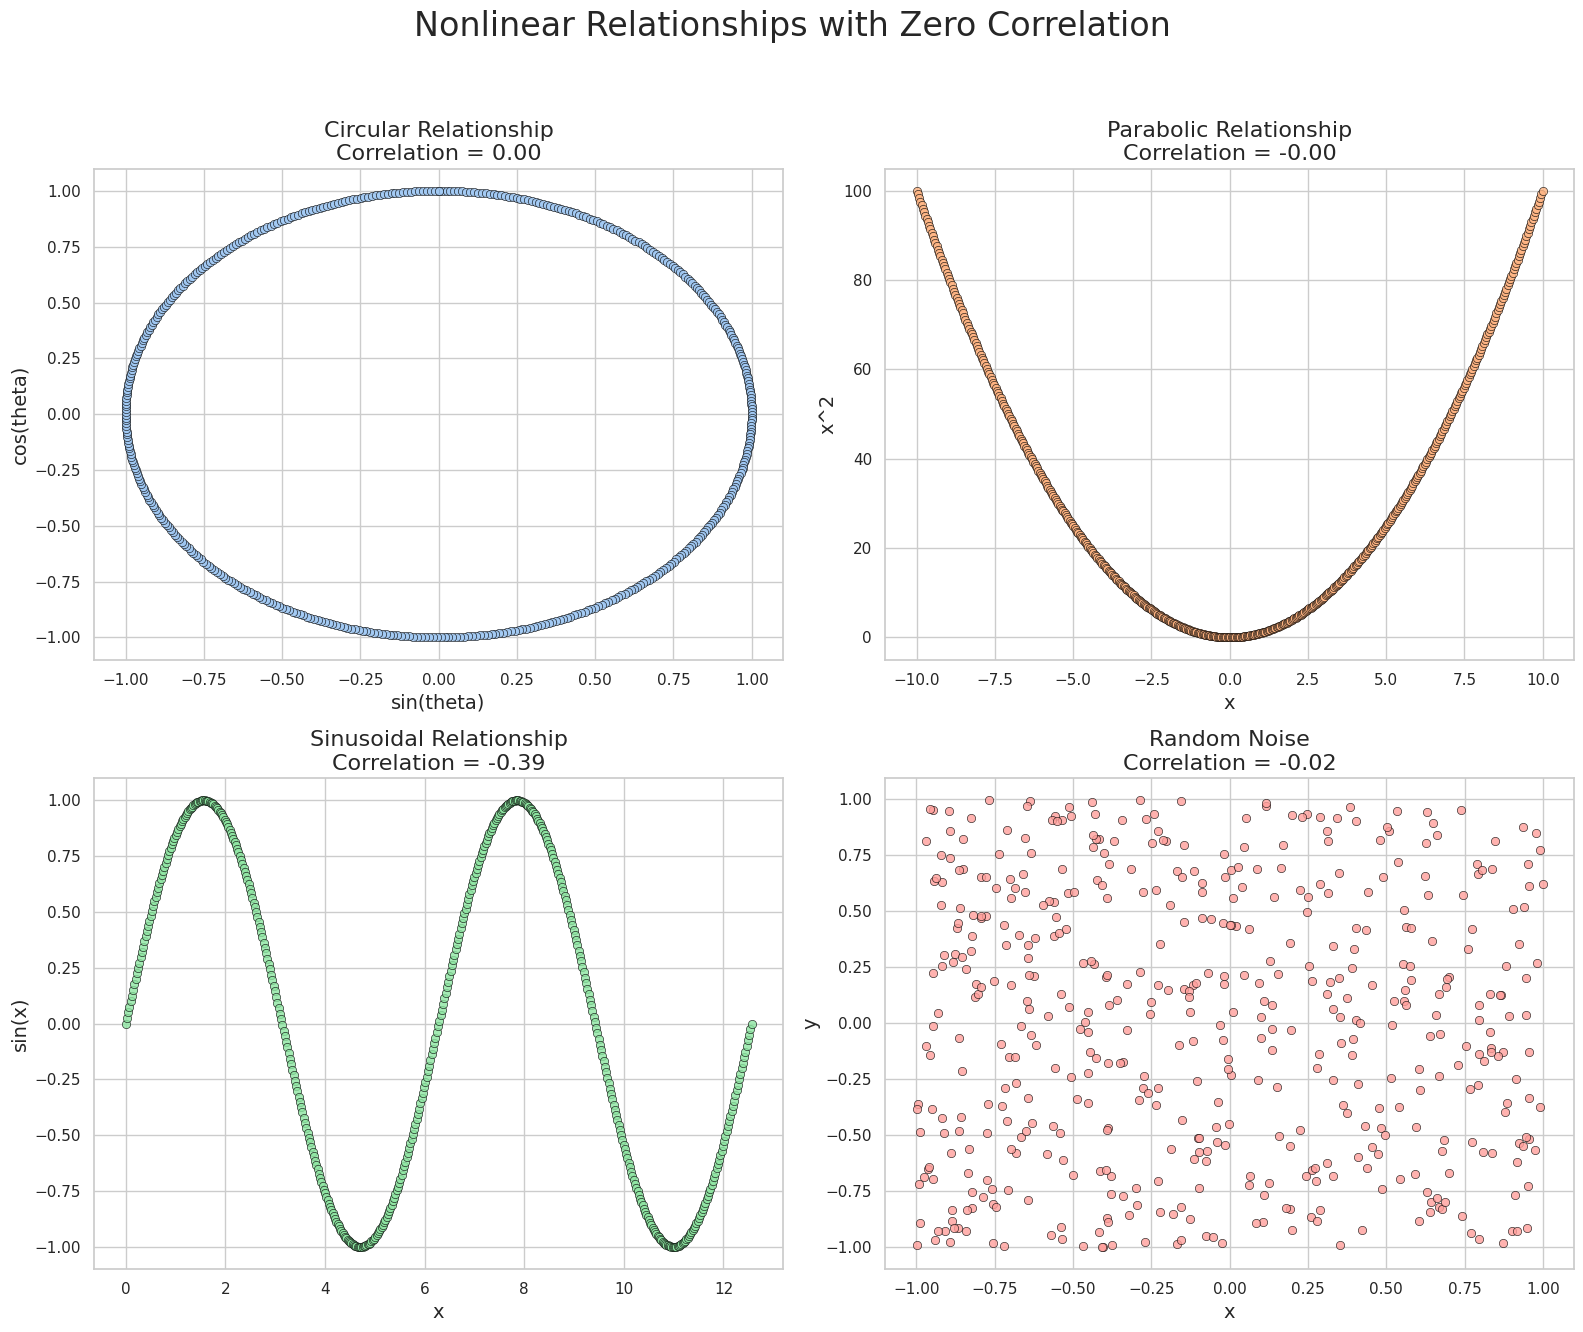

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Define a function to calculate Pearson correlation using covariance
def pearson_correlation(x, y):
    cov_xy = np.cov(x, y, bias=True)[0, 1]  # Covariance between x and y
    std_x = np.std(x)  # Standard deviation of x
    std_y = np.std(y)  # Standard deviation of y
    return cov_xy / (std_x * std_y)

# Create subplots with a larger figure size and more spacing
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Nonlinear Relationships with Zero Correlation', fontsize=24)

# Example 1: Circular Relationship
theta = np.linspace(0, 2 * np.pi, 500)
x1 = np.sin(theta)
y1 = np.cos(theta)
corr1 = pearson_correlation(x1, y1)
sns.scatterplot(x=x1, y=y1, ax=axes[0, 0], color=sns.color_palette("pastel")[0], edgecolor='black', alpha=0.8)
axes[0, 0].set_title(f'Circular Relationship\nCorrelation = {corr1:.2f}', fontsize=16)
axes[0, 0].set_xlabel('sin(theta)', fontsize=14)
axes[0, 0].set_ylabel('cos(theta)', fontsize=14)

# Example 2: Parabolic Relationship
x2 = np.linspace(-10, 10, 500)
y2 = x2**2
corr2 = pearson_correlation(x2, y2)
sns.scatterplot(x=x2, y=y2, ax=axes[0, 1], color=sns.color_palette("pastel")[1], edgecolor='black', alpha=0.8)
axes[0, 1].set_title(f'Parabolic Relationship\nCorrelation = {corr2:.2f}', fontsize=16)
axes[0, 1].set_xlabel('x', fontsize=14)
axes[0, 1].set_ylabel('x^2', fontsize=14)

# Example 3: Sinusoidal Relationship
x3 = np.linspace(0, 4 * np.pi, 500)
y3 = np.sin(x3)
corr3 = pearson_correlation(x3, y3)
sns.scatterplot(x=x3, y=y3, ax=axes[1, 0], color=sns.color_palette("pastel")[2], edgecolor='black', alpha=0.8)
axes[1, 0].set_title(f'Sinusoidal Relationship\nCorrelation = {corr3:.2f}', fontsize=16)
axes[1, 0].set_xlabel('x', fontsize=14)
axes[1, 0].set_ylabel('sin(x)', fontsize=14)

# Example 4: Random Noise (Control)
x4 = np.random.uniform(-1, 1, 500)
y4 = np.random.uniform(-1, 1, 500)
corr4 = pearson_correlation(x4, y4)
sns.scatterplot(x=x4, y=y4, ax=axes[1, 1], color=sns.color_palette("pastel")[3], edgecolor='black', alpha=0.8)
axes[1, 1].set_title(f'Random Noise\nCorrelation = {corr4:.2f}', fontsize=16)
axes[1, 1].set_xlabel('x', fontsize=14)
axes[1, 1].set_ylabel('y', fontsize=14)

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Correlation is not Causation

### What is Correlation?

Correlation measures the strength and direction of a linear relationship between two variables. A strong correlation between two variables suggests that they move together in some consistent manner. However, **correlation does not imply causation**. This is a fundamental concept in statistics that is often misunderstood or overlooked.

### The Myth: Correlation Implies Causation

A common misconception is that if two variables are strongly correlated, one must cause the other. However, this is not necessarily the case. Correlation simply indicates that there is a relationship between two variables, but it doesn't tell us anything about why that relationship exists. The correlation could be due to:
1. **Causation**: One variable directly influences the other.
2. **Confounding**: A third variable influences both variables, creating the illusion of a direct relationship.
3. **Coincidence**: The correlation could simply be a random coincidence with no underlying connection.

### Examples of Correlation Without Causation

Below, we will explore examples of correlated variables that do not have a causal relationship. 

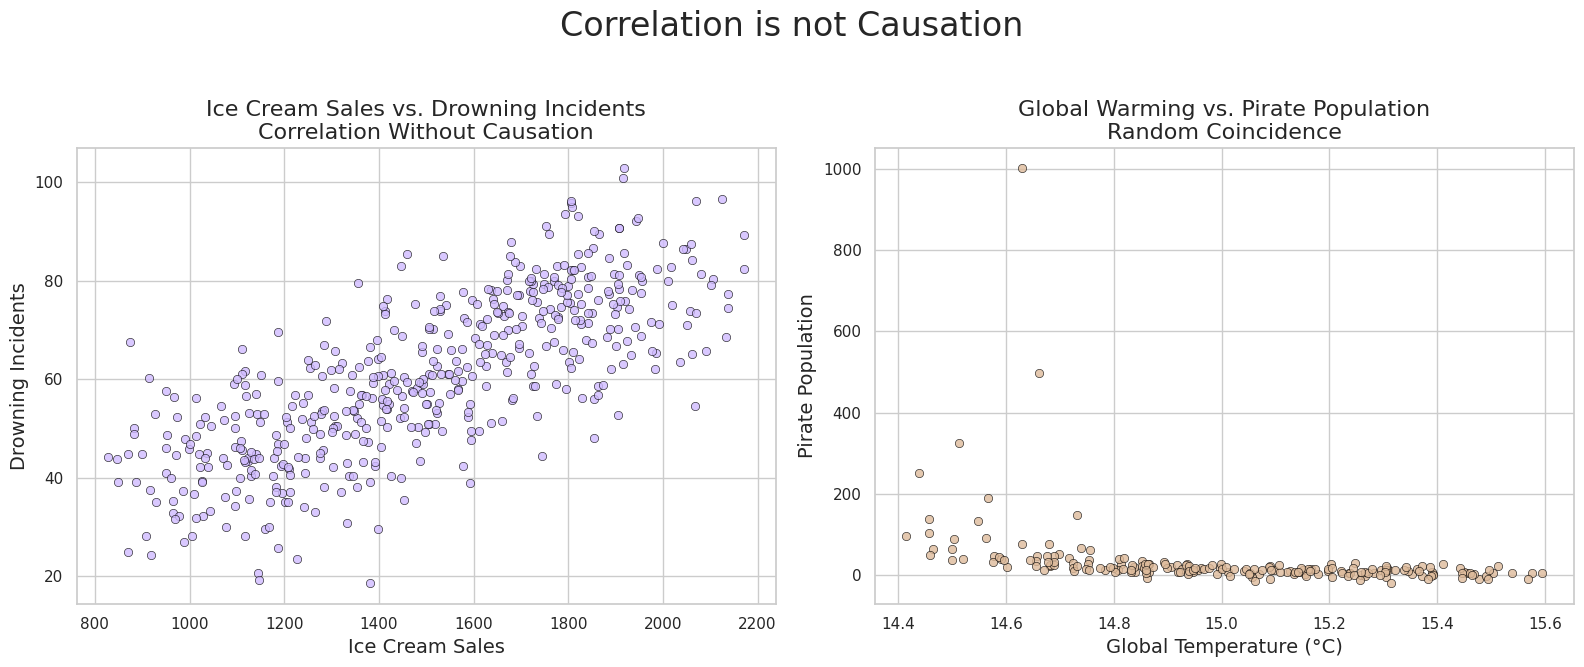

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Create subplots with a larger figure size and more spacing
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('Correlation is not Causation', fontsize=24)

# Example 1: Confounding Variable (Ice Cream Sales vs. Drowning Incidents)
np.random.seed(42)
temperature = np.random.uniform(20, 40, 500)  # Simulated temperature data
ice_cream_sales = temperature * 50 + np.random.normal(0, 100, 500)  # Higher sales in hotter weather
drowning_incidents = temperature * 2 + np.random.normal(0, 10, 500)  # More drownings in hotter weather

sns.scatterplot(x=ice_cream_sales, y=drowning_incidents, ax=axes[0], color=sns.color_palette("pastel")[4], edgecolor='black', alpha=0.8)
axes[0].set_title('Ice Cream Sales vs. Drowning Incidents\nCorrelation Without Causation', fontsize=16)
axes[0].set_xlabel('Ice Cream Sales', fontsize=14)
axes[0].set_ylabel('Drowning Incidents', fontsize=14)

# Example 2: Random Coincidence (Global Warming vs. Pirate Population)
years = np.arange(1800, 2000)
global_warming = np.linspace(14.5, 15.5, len(years)) + np.random.normal(0, 0.1, len(years))  # Slight increase in global temperature
pirate_population = 1 / (years - 1800 + 1) * 1000 + np.random.normal(0, 10, len(years))  # Decline in pirate population

sns.scatterplot(x=global_warming, y=pirate_population, ax=axes[1], color=sns.color_palette("pastel")[5], edgecolor='black', alpha=0.8)
axes[1].set_title('Global Warming vs. Pirate Population\nRandom Coincidence', fontsize=16)
axes[1].set_xlabel('Global Temperature (°C)', fontsize=14)
axes[1].set_ylabel('Pirate Population', fontsize=14)

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show();


# Simpson's Paradox

### What is Simpson's Paradox?

**Simpson's Paradox** is a phenomenon in statistics where a trend that appears in several groups of data reverses or disappears when the groups are combined. It highlights how misleading aggregated data can be and demonstrates the importance of analyzing data in context.

Simpson's Paradox occurs when the relationship between variables changes depending on how the data is grouped. In some cases, combining data across different groups can obscure the true relationship between variables, leading to incorrect conclusions.

### Key Points:
1. **Group-Level Trends vs. Aggregate Trends**: Simpson's Paradox shows that trends that are visible in individual groups can disappear or reverse when the data is aggregated.
2. **Misleading Aggregation**: The paradox reveals how summarizing data across different groups without considering the context can lead to misleading results.
3. **Importance of Stratified Analysis**: To avoid falling into the trap of Simpson's Paradox, it's crucial to analyze data within relevant subgroups before drawing conclusions from aggregate data.

### Example of Simpson's Paradox

In the example below, we will visualize data for two groups, showing a trend within each group. When the data from both groups are combined, the trend reverses, illustrating Simpson's Paradox.


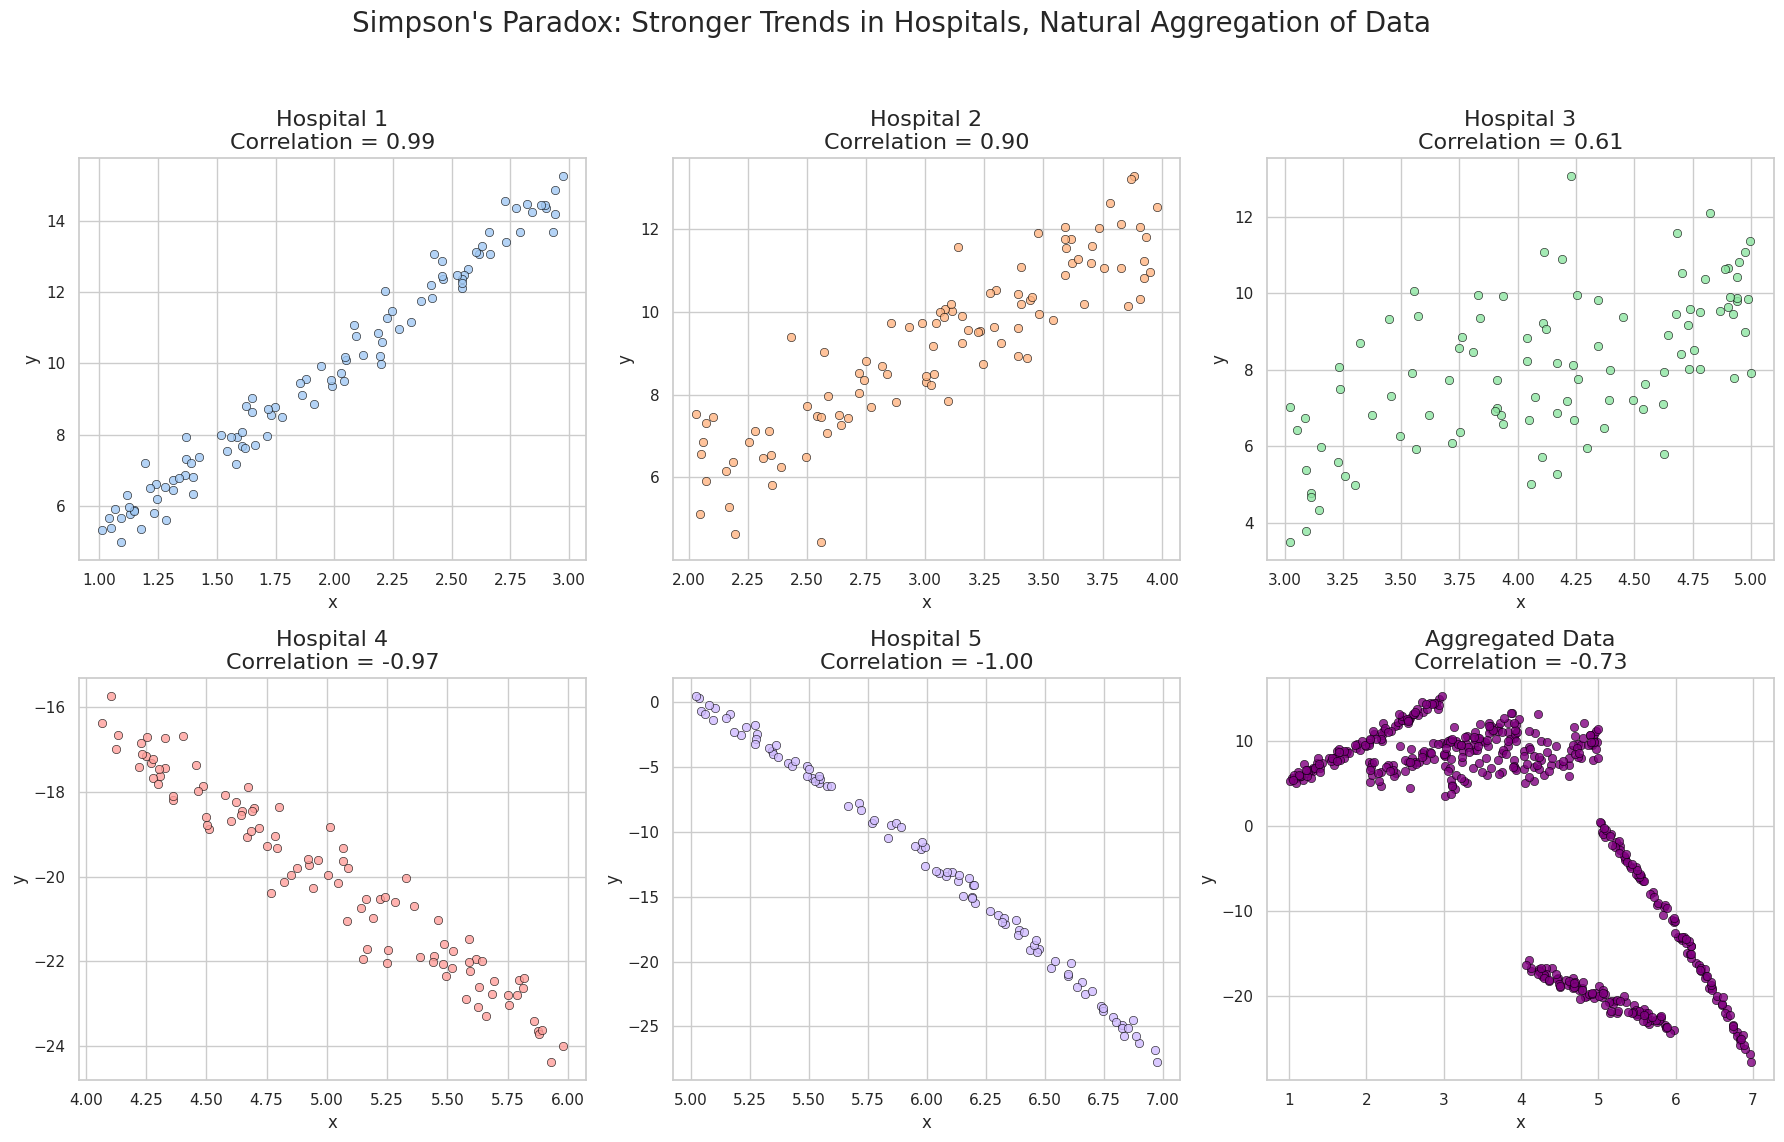

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the Seaborn style
sns.set(style="whitegrid", palette="pastel")

# Function to calculate Pearson correlation and format the title
def calculate_and_format_correlation(data, x_col, y_col):
    correlation = np.corrcoef(data[x_col], data[y_col])[0, 1]
    return f"Correlation = {correlation:.2f}"

# Simulate data for five hospitals with varying shapes and correlations, emphasizing stronger trends
np.random.seed(42)

# Hospital 1: Strong positive correlation with less noise
group_1 = pd.DataFrame({'x': np.random.uniform(1, 3, 100)})
group_1['y'] = 5 * group_1['x'] + np.random.normal(0, 0.5, 100)
group_1['group'] = 'Hospital 1'

# Hospital 2: Moderate positive correlation with some noise
group_2 = pd.DataFrame({'x': np.random.uniform(2, 4, 100)})
group_2['y'] = 3 * group_2['x'] + np.random.normal(0, 1, 100)
group_2['group'] = 'Hospital 2'

# Hospital 3: Weak positive correlation with some noise
group_3 = pd.DataFrame({'x': np.random.uniform(3, 5, 100)})
group_3['y'] = 2 * group_3['x'] + np.random.normal(0, 1.5, 100)
group_3['group'] = 'Hospital 3'

# Hospital 4: Strong negative correlation with less noise
group_4 = pd.DataFrame({'x': np.random.uniform(4, 6, 100)})
group_4['y'] = -4 * group_4['x'] + np.random.normal(0, 0.5, 100)
group_4['group'] = 'Hospital 4'

# Hospital 5: Nonlinear relationship (quadratic) but less noise
group_5 = pd.DataFrame({'x': np.random.uniform(5, 7, 100)})
group_5['y'] = -2 * group_5['x']**2 + 10 * group_5['x'] + np.random.normal(0, 0.5, 100)
group_5['group'] = 'Hospital 5'

# Combine all groups into one dataset without modifying y-values
combined_data = pd.concat([group_1, group_2, group_3, group_4, group_5])

# Set up the plot
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Simpson's Paradox: Stronger Trends in Hospitals, Natural Aggregation of Data", fontsize=20)

# Plot for each hospital and show the correlation
sns.scatterplot(data=group_1, x='x', y='y', ax=axes[0, 0], color=sns.color_palette("pastel")[0], edgecolor='black', alpha=0.8)
axes[0, 0].set_title(f'Hospital 1\n{calculate_and_format_correlation(group_1, "x", "y")}', fontsize=16)

sns.scatterplot(data=group_2, x='x', y='y', ax=axes[0, 1], color=sns.color_palette("pastel")[1], edgecolor='black', alpha=0.8)
axes[0, 1].set_title(f'Hospital 2\n{calculate_and_format_correlation(group_2, "x", "y")}', fontsize=16)

sns.scatterplot(data=group_3, x='x', y='y', ax=axes[0, 2], color=sns.color_palette("pastel")[2], edgecolor='black', alpha=0.8)
axes[0, 2].set_title(f'Hospital 3\n{calculate_and_format_correlation(group_3, "x", "y")}', fontsize=16)

sns.scatterplot(data=group_4, x='x', y='y', ax=axes[1, 0], color=sns.color_palette("pastel")[3], edgecolor='black', alpha=0.8)
axes[1, 0].set_title(f'Hospital 4\n{calculate_and_format_correlation(group_4, "x", "y")}', fontsize=16)

sns.scatterplot(data=group_5, x='x', y='y', ax=axes[1, 1], color=sns.color_palette("pastel")[4], edgecolor='black', alpha=0.8)
axes[1, 1].set_title(f'Hospital 5\n{calculate_and_format_correlation(group_5, "x", "y")}', fontsize=16)

# Plot for combined data and show the correlation
sns.scatterplot(x=combined_data['x'], y=combined_data['y'], ax=axes[1, 2], color='purple', edgecolor='black', alpha=0.8)
axes[1, 2].set_title(f'Aggregated Data\n{calculate_and_format_correlation(combined_data, "x", "y")}', fontsize=16)

# Adjust layout and show plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
